In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [109]:
num = 0
e = 4

In [110]:
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
prior_weights *= -1

In [111]:
model = Net_mask()
model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

In [112]:
print(init_weights)
print(prior_weights)
print(posterior_weights)

tensor([ 0.0323,  0.0241,  0.2177,  ...,  0.0099,  0.0236, -0.0335],
       grad_fn=<CatBackward0>)
tensor([-0.5871, -0.5826,  0.0412,  ...,  0.1107,  0.3478,  0.7406])
tensor([0.0238, 0.0733, 0.1377,  ..., 0.3689, 0.0090, 0.3881],
       grad_fn=<CatBackward0>)


In [113]:
print(torch.sum((init_weights + prior_weights)**2))

tensor(1263.3491, grad_fn=<SumBackward0>)


In [114]:
x_min = -1
x_max = 1
lim1 = 0.15
lim2 = 0.05
#lim2 = lim1
x = np.linspace(x_min, x_max, 1000)
x2_p1 = np.linspace(x_min, lim2-lim1, 1000)
x2_p2 = np.linspace(lim2+lim1, x_max, 1000)
x2_p3 = np.linspace(x_min, -lim1 - lim2, 1000)
x2_p4 = np.linspace(-lim2 + lim1, x_max, 1000)
y2_p1 = x2_p1*0+lim2
y2_p2 = x2_p2*0+lim2
y2_p3 = x2_p3*0 -lim2
y2_p4 = x2_p4*0 -lim2
a1_up = lim1 + x
a1_down = -lim1 + x
a2_up = lim2 + 0*x
a2_down = -lim2 + 0*x

p_x = [lim2 - lim1, lim2 + lim1, -lim2 - lim1, -lim2 + lim1]
p_y = [lim2, lim2, -lim2, -lim2]

Text(0, 0.5, 'posterior weights')

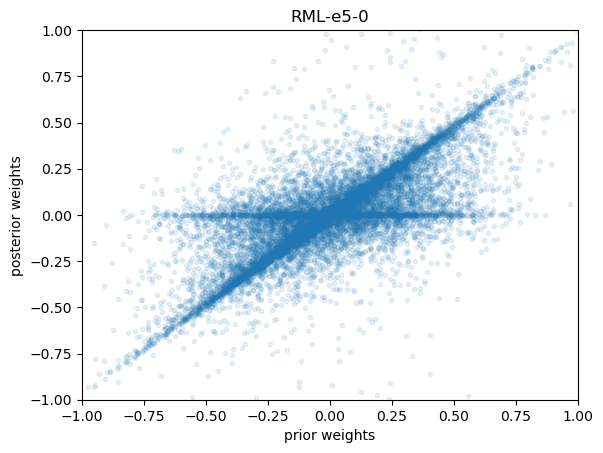

In [115]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.axis([x_min, x_max, x_min, x_max])
#plt.title('RML-e4-0')
plt.title('RML-e5-0')
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
#plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e4_0_plain.png')
#plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e5_0_plain.png')

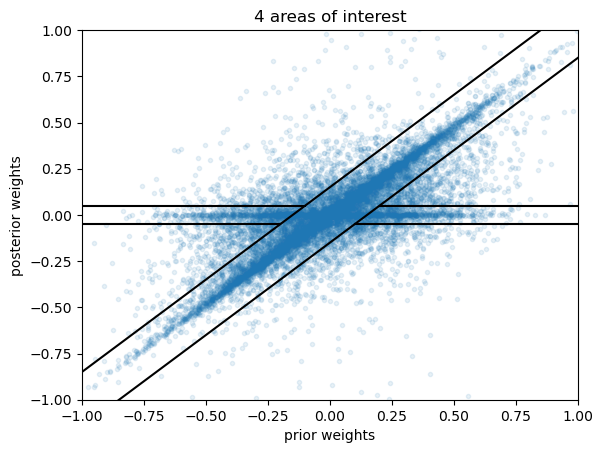

In [127]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.plot(x, a1_up, 'k')
plt.plot(x, a1_down, 'k')
plt.plot(x2_p1, y2_p1, 'k')
plt.plot(x2_p2, y2_p2, 'k')
plt.plot(x2_p3, y2_p3, 'k')
plt.plot(x2_p4, y2_p4, 'k')
#plt.plot(x, a2_up, 'r')
#plt.plot(x, a2_down, 'r')
#plt.plot(p_x, p_y, 'bo')
#plt.plot([-1, 1], [-1, 1], alpha=0.1)

x_point = 0.3
a1_min = x_point - lim1
a1_max = x_point + lim1
a2_min = -lim2
a2_max = lim2
x_point_neg = -0.3
a1_min_neg = x_point_neg - lim1
a1_max_neg = x_point_neg + lim1
a2_min_neg = -lim2
a2_max_neg = lim2
#plt.plot([x_point, x_point, x_point, x_point], [a1_min, a1_max, a2_min, a2_max], 'bo')
#plt.plot([x_point_neg, x_point_neg, x_point_neg, x_point_neg], [a1_min_neg, a1_max_neg, a2_min_neg, a2_max_neg], 'bo')

#plt.plot(x, x*0, 'r')
#plt.plot(0*x, x, 'r')
plt.axis([x_min, x_max, x_min, x_max])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('4 areas of interest')
plt.savefig(f'../figures/plot_weights_posterior_vs_prior/4_areas.png')

In [117]:
#prior_weights = prior_weights 
a1_min_tens = prior_weights - lim1
a1_max_tens = prior_weights + lim1
a2_min_tens = prior_weights*0 - lim2
a2_max_tens = prior_weights*0 + lim2

In [118]:
#plt.plot(prior_weights, a1_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a1_max_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_max_tens, '.', alpha=0.1)

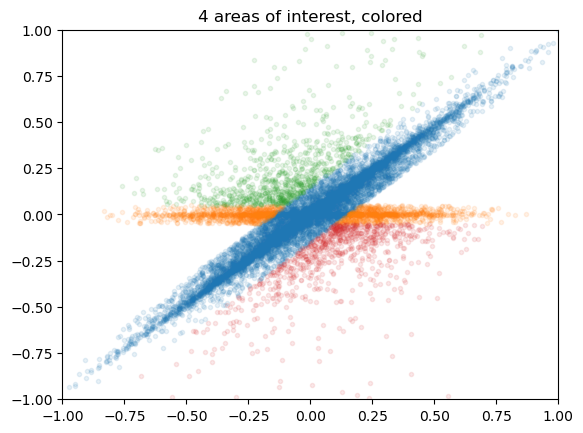

In [129]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)
a1_prior = torch.masked_select(prior_weights, a1_mask)
a2_prior = torch.masked_select(prior_weights, a2_mask)
a3_prior = torch.masked_select(prior_weights, a3_mask)
a4_prior = torch.masked_select(prior_weights, a4_mask)
a1_posterior = torch.masked_select(posterior_weights, a1_mask)
a2_posterior = torch.masked_select(posterior_weights, a2_mask)
a3_posterior = torch.masked_select(posterior_weights, a3_mask)
a4_posterior = torch.masked_select(posterior_weights, a4_mask)
plt.plot(a1_prior.detach(), a1_posterior.detach(), '.', alpha=0.1)
plt.plot(a2_prior.detach(), a2_posterior.detach(), '.', alpha=0.1)
plt.plot(a3_prior.detach(), a3_posterior.detach(), '.', alpha=0.1)
plt.plot(a4_prior.detach(), a4_posterior.detach(), '.', alpha=0.1)

#plt.plot(x, a1_up, 'k')
#plt.plot(x, a1_down, 'k')
#plt.plot(x2_p1, y2_p1, 'k')
#plt.plot(x2_p2, y2_p2, 'k')
#plt.plot(x2_p3, y2_p3, 'k')
#plt.plot(x2_p4, y2_p4, 'k')

plt.axis([x_min, x_max, x_min, x_max])
plt.title('4 areas of interest, colored')
plt.savefig('../figures/plot_weights_posterior_vs_prior/4_areas_colored.png')

In [120]:
print(len(a1_prior))
print(len(a1_posterior))
print(len(a2_prior))
print(len(a2_posterior))
print(len(a3_prior))
print(len(a3_posterior))
print(len(a4_prior))
print(len(a4_posterior))
print(len(a1_prior) + len(a2_prior) + len(a3_prior) + len(a4_prior))
print(len(posterior_weights))

8855
8855
1640
1640
818
818
810
810
12123
13210


(array([  0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,
          1.,   5.,   1.,   0.,   2.,   3.,   3.,   1.,   2.,   2.,   4.,
          3.,   1.,   4.,   8.,   5.,   8.,  11.,   9.,   4.,  12.,   6.,
          8.,  17.,  18.,  18.,  16.,  15.,  24.,  27.,  20.,  28.,  21.,
         40.,  36.,  48.,  53.,  56.,  52.,  60.,  68.,  69.,  93.,  92.,
         90., 101., 111., 132., 134., 157., 144., 138., 158., 166., 175.,
        196., 224., 231., 238., 283., 290., 294., 301., 374., 375., 401.,
        858., 851., 428., 389., 320., 333., 311., 266., 269., 254., 245.,
        260., 212., 194., 198., 169., 148., 162., 125., 126., 111., 110.,
        100.,  81.,  88.,  81.,  74.,  70.,  74.,  63.,  48.,  40.,  44.,
         25.,  34.,  34.,  34.,  22.,  20.,  22.,  22.,  22.,  14.,  18.,
         15.,  11.,   7.,   6.,   8., 

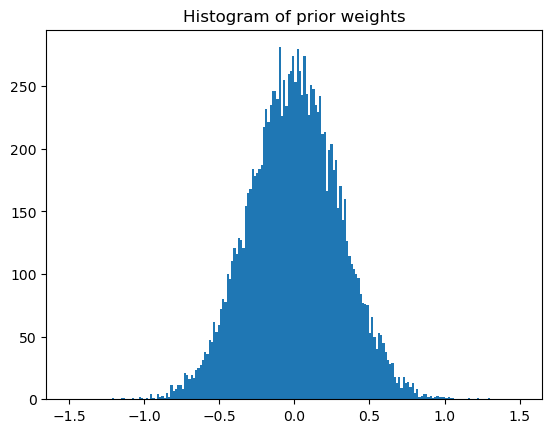

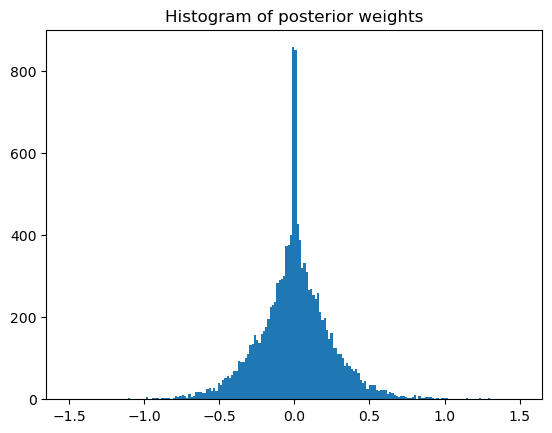

In [121]:
plt.figure(1)
plt.title('Histogram of prior weights')
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.title('Histogram of posterior weights')
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [122]:
sorted_prior, _ = torch.sort(prior_weights)
sorted_posterior, _ = torch.sort(posterior_weights)
print(sorted_prior)
print(sorted_posterior)

tensor([-1.2137, -1.1547, -1.1347,  ...,  1.1686,  1.2183,  1.2996])
tensor([-2.2367, -1.9288, -1.4661,  ...,  1.2976,  1.3306,  1.4605],
       grad_fn=<SortBackward0>)


In [123]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(0.0006)
tensor(0.2999)
tensor(0.0014, grad_fn=<MeanBackward0>)
tensor(0.2480, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

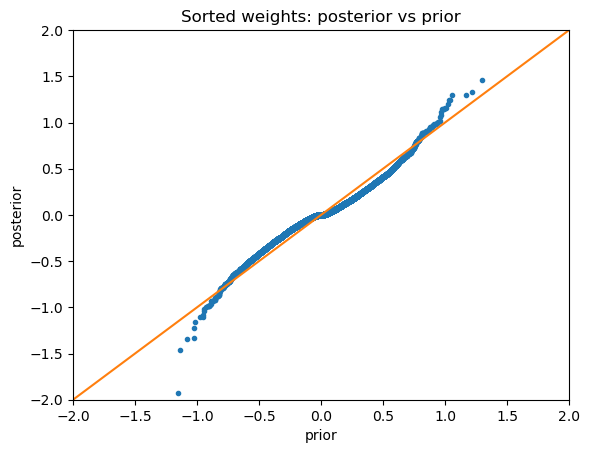

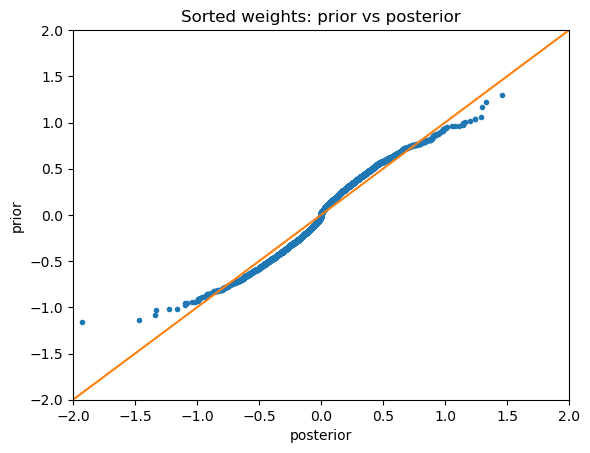

In [124]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(sorted_prior.detach(), sorted_posterior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(sorted_posterior.detach(), sorted_prior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')